# Import lib


In [80]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [81]:
df = pd.read_csv('../data.csv')

C:\Users\vuanh\AppData\Local\Temp\ipykernel_23540\3454644713.py:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data.csv')


# Discover and visualise the data

#### remove irrelevant features

In [82]:
remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',

    # Vu Anh
    # 'home-ownership'
    # 'purpose', 
    # 'sub_grade',
    'tot_coll_amt', 
    'tot_cur_bal', 
    'open_acc_6m', 
    'open_il_6m', 

    # Darrel
    'open_il_12m', 
    'open_il_24m', 
    'mths_since_rcnt_il', 
    'total_bal_il', 
    'il_util', 
    'open_rv_12m' ,
    'open_rv_24m', 

    # Vanness
    'max_bal_bc', 
    'all_util', 
    'total_rev_hi_lim', 
    'inq_fi', 
    'total_cu_tl', 
    'inq_last_12m'
]

## Handle home-ownership

In [83]:
# Remove rows with value ANY

df = df[df['home_ownership'] != 'ANY']

df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [84]:
# Level encoding for home ownership 

home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df['home_ownership'] = encoder.transform(df['home_ownership'])

## Handle purpose

In [85]:
df['purpose'].unique()

purposes = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(purposes)

# Encode the 'grade' column in the DataFrame
df['purpose'] = encoder.transform(df['purpose'])

In [86]:
# Count the occurrences of each label
label_counts = df['purpose'].value_counts().sort_index()

# Print the label counts
for label, count in label_counts.items():
    print(f"{label}: {count}")

0: 8593
1: 200144
2: 505390
3: 326
4: 49956
5: 3513
6: 16587
7: 8193
8: 5160
9: 40948
10: 549
11: 9785
12: 4542
13: 2280


## Handle sub_grade

The sub-grade is a more detailed classification that further divides borrowers within each grade. It typically includes additional factors such as credit history, employment stability, and debt-to-income ratio. This additional level of detail can help in distinguishing the risk profile of borrowers within the same grade.

This is why we should keep the subgrade

In [120]:
df['sub_grade'].unique()


array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [88]:
df = df.drop(remove_col, axis=1)

In [89]:
np.shape(df)

(855966, 40)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855966 entries, 0 to 855968
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  855966 non-null  int64  
 1   funded_amnt                855966 non-null  int64  
 2   funded_amnt_inv            855966 non-null  float64
 3   term                       855966 non-null  object 
 4   int_rate                   855966 non-null  float64
 5   installment                855966 non-null  float64
 6   grade                      855966 non-null  object 
 7   sub_grade                  855966 non-null  object 
 8   emp_length                 812905 non-null  object 
 9   home_ownership             855966 non-null  int32  
 10  annual_inc                 855966 non-null  float64
 11  verification_status        855966 non-null  object 
 12  pymnt_plan                 855966 non-null  object 
 13  purpose                    85

### Process missing value

In [91]:
# Display all attributes with missing values

null_columns = df.columns[df.isnull().any()] 
null_columns_result = df.isnull().any()[null_columns] 
null_columns_result

emp_length                   True
mths_since_last_delinq       True
mths_since_last_record       True
revol_util                   True
annual_inc_joint             True
dti_joint                    True
verification_status_joint    True
dtype: bool

#### Emp_length

In [92]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [93]:
label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(df['emp_length'].unique())

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [94]:
df['emp_length'].unique()

array([ 1, 10,  0,  3,  8,  9,  4,  5,  6,  2,  7, 11])

#### mths_since_last_delinq 

In [95]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

#### mths_since_last_record

In [96]:
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

#### revol_util

In [97]:
imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

#### annual_inc_joint

In [98]:
# aggregate annual_inc and annual_inc_joint
df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

#### dti_joint 

In [99]:
df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

#### verification_status_joint 

In [100]:
df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

### Data binning

#### term

In [101]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [102]:
term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

### grade

In [103]:
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(grades)

df['grade'] = encoder.transform(df['grade'])

### verification_status

In [104]:
veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

### pymnt_plan

In [105]:
plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(plan)

df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

### application_type

In [106]:
type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

#### initial_list_status

In [107]:

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

### Generate new feature

In [108]:
# Generate the new feature
df['open_acc_rate'] = df['open_acc'] / df['total_acc']
# Swap the values and column names
df['open_acc_rate'], df['default_ind'] = df['default_ind'].copy(), df['open_acc_rate'].copy()
df.rename(columns={'open_acc_rate': 'default_ind', 'default_ind': 'open_acc_rate'}, inplace=True)

In [109]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,acc_now_delinq,open_acc_rate,default_ind
0,5000,5000,4975.0,0,10.65,162.87,1,B2,1,4,...,5831.78,5000.00,861.07,0.00,0.00,0.00,0,0,0.333333,0
1,2500,2500,2500.0,1,15.27,59.83,2,C4,10,4,...,1008.71,456.46,435.17,0.00,117.08,1.11,0,0,0.750000,1
2,2400,2400,2400.0,0,15.96,84.33,2,C5,1,4,...,3003.65,2400.00,603.65,0.00,0.00,0.00,0,0,0.200000,0
3,10000,10000,10000.0,0,13.49,339.31,2,C1,1,4,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,0,0,0.270270,0
4,3000,3000,3000.0,1,12.69,67.79,1,B5,0,4,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,0,0,0.394737,0


In [110]:
np.shape(df)

(855966, 38)

### Visualize

C:\Users\vuanh\AppData\Local\Temp\ipykernel_23540\887418557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


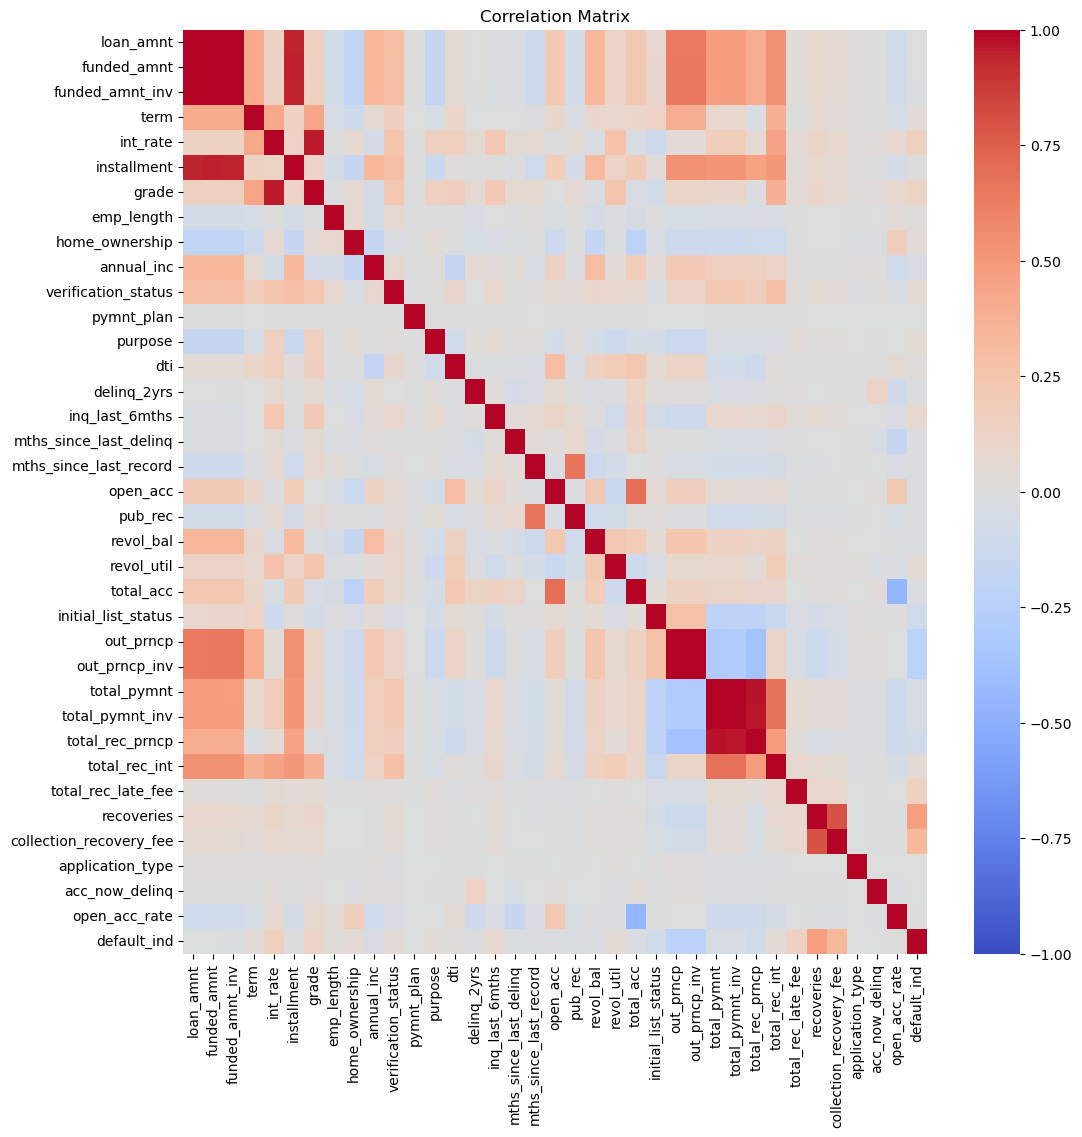

In [111]:
# Create a correlation matrix
corr_matrix = df.corr()

# Select the correlation values with 'default_ind'
target_corr = corr_matrix['default_ind']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Attribute ranking

In [112]:
# Take the absolute values of the correlation
abs_corr = target_corr.abs()

# Sort the absolute correlation values
sorted_corr = abs_corr.sort_values(ascending=False)

# Display the attribute ranking
attribute_ranking = sorted_corr.reset_index()
attribute_ranking.columns = ['Attribute', 'Absolute Correlation']
attribute_ranking

,Attribute,Absolute Correlation
0,default_ind,1.000000
1,recoveries,0.475738
2,collection_recovery_fee,0.330764
3,out_prncp,0.225961
4,out_prncp_inv,0.225960
5,int_rate,0.155037
6,total_rec_late_fee,0.140760
7,grade,0.123656
8,initial_list_status,0.098812
9,total_rec_prncp,0.090336
